In [2]:
%pip install git+https://github.com/inseq-team/inseq.git

  Cloning https://github.com/inseq-team/inseq.git to /tmp/pip-req-build-equxukvu
  Running command git clone --filter=blob:none --quiet https://github.com/inseq-team/inseq.git /tmp/pip-req-build-equxukvu
  Resolved https://github.com/inseq-team/inseq.git to commit 01bd08bd9e4f6b2d74b3c49d2bca81578102e50e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.4 MB/s eta 0:00:00
  Created wheel for inseq: filename=inseq-0.7.0.dev0-py3-none-any.whl size=187438 sha256=6edbec32bf07235008c993c016a46296258f437cf7a41211e907ff27f8246da9
  Stored in directory: /tmp/pip-ephem-wheel-cache-btz3viof/wheels/a0/a1/36/69a43da0b84a9c43b242a1927f7fb638a147e7c0392982ba43
Successfully built inseq
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uni

In [ ]:
import inseq
# As an example, print the first 3 sentences of the dataset in German

from datasets import load_dataset
working_dataset = load_dataset('gsarti/wmt_vat', 'wmt19_de_en', split='test', trust_remote_code=True)
for i in range (3):
  print(working_dataset[i]['source'])

In [4]:
# show feature attribtuion methods available in inseq
print(inseq.list_feature_attribution_methods())

['integrated_gradients', 'reagent', 'discretized_integrated_gradients', 'lime', 'gradient_shap', 'layer_deeplift', 'occlusion', 'deeplift', 'layer_gradient_x_activation', 'attention', 'layer_integrated_gradients', 'dummy', 'value_zeroing', 'sequential_integrated_gradients', 'saliency', 'input_x_gradient']


In [42]:
# outputs[] contains the first X translated sentences (in English) from the dataset

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from datasets import load_dataset

working_dataset = load_dataset('gsarti/wmt_vat', 'wmt19_de_en', split='test')

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")
tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
input_lang = 'de_German'
target_lang = 'eng_Latn'

outputs = []

translation_pipeline = pipeline('translation',
                                model=model,
                                tokenizer=tokenizer,
                                src_lang=input_lang,
                                tgt_lang=target_lang
                                )

for i in range (200):
  print("dataset point:", i)
  # print(working_dataset[i]['source'])
  output = translation_pipeline(working_dataset[i]['source'])
  # print(output[0]['translation_text'])
  outputs.append(output[0]['translation_text'])


dataset point: 0
dataset point: 1
dataset point: 2
dataset point: 3
dataset point: 4
dataset point: 5
dataset point: 6
dataset point: 7
dataset point: 8
dataset point: 9
dataset point: 10
dataset point: 11
dataset point: 12
dataset point: 13
dataset point: 14
dataset point: 15
dataset point: 16
dataset point: 17
dataset point: 18
dataset point: 19
dataset point: 20
dataset point: 21
dataset point: 22
dataset point: 23
dataset point: 24
dataset point: 25
dataset point: 26
dataset point: 27
dataset point: 28
dataset point: 29
dataset point: 30
dataset point: 31
dataset point: 32
dataset point: 33
dataset point: 34
dataset point: 35
dataset point: 36
dataset point: 37
dataset point: 38
dataset point: 39
dataset point: 40
dataset point: 41
dataset point: 42
dataset point: 43
dataset point: 44
dataset point: 45
dataset point: 46
dataset point: 47
dataset point: 48
dataset point: 49
dataset point: 50
dataset point: 51
dataset point: 52
dataset point: 53
dataset point: 54
dataset point: 55
da

In [6]:
# We can print the sentences in the original language along with the translation like so:

for i in range (20):
  print(working_dataset[i]['source'])
  print(outputs[i])

Von az, aktualisiert am 04.05.2018 um 11:11
Von az, updated at 04.05.2018 at 11:11 am
"Schöne Münchnerin" 2018 werden!
"Beautiful Münchnerin" 2018 will be!
Hvar - Flirten, kokettieren, verführen - keine einfachen Aufgaben für unsere Mädchen.
Where - flirting, flirting, seducing - are not easy tasks for our girls.
"Das ist eine Frage, die natürlich davon abhängt, dass man einmal ins Gespräch kommt, dass man mit ihm auch darüber spricht, warum er das eine oder andere offenbar so empfunden hat, wie das in seinem Statement niedergelegt ist", sagte Grindel im Fußball-Podcast "Phrasenmäher" der "Bild-Zeitung.
"This is a question, which naturally depends on the fact that you enter the conversation once, that you also talk to him about why he has apparently felt one or the other, as set out in his Statement", Grindel told Bild-Zeitung's "Phrasenmäher" in the Fußball-Podcast.
De 29-Jährige hatte im Juli seinen Rücktritt aus dem DFB-Team erklärt und diesen auch damit begründet, dass ihn Grindel 

In [31]:
# ALSO INPUT_X_GRADIENT instead of SALIENCY
# Attribute the X first sentences of the dataset using inseq, with the attribution method "input_x_gradient" and the "mc_dropout_prob_avg" step function provided by inseq
# The generation target is provided by the outputs[] list generated above
# The FeatureAttributions objects are saved inside the loop. Ideally we would like to dave it as a list of objects at the end of the loop but I couldn't figure out the inseq command if such exists (it was giving some errors)
import numpy as np
import inseq
from transformers import AutoModelForSeq2SeqLM

model = inseq.load_model(
    "facebook/nllb-200-distilled-600M",
    "input_x_gradient",
#     "gradient_shap",
    # The tokenizer_kwargs are used to specify the source and target languages upon initialization
    tokenizer_kwargs={"src_lang": input_lang, "tgt_lang": target_lang},
)
auxiliary = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# This indicates that the loaded model is being fine-tuned or trained on specific data, right? what is it trained on?
model.train()
# print(model.model.config.dropout)
model.model.config.dropout = 0.4

# The indices of the 20 least uncertain sentences
# least_uncertain_indices = [27, 89, 138, 143, 122, 160, 29, 51, 96, 176, 190, 87, 179, 36, 111, 119, 161, 185, 165, 129]
# most_uncertain_indices = [45, 72, 58, 198, 192, 1, 22, 147, 25, 178, 84, 172, 113, 164, 37,100, 81, 193, 17, 46]
least_uncertain_indices = [84, 172, 113, 164, 37, 100, 81, 193, 17, 46]

outs_input_x_gradient_uncertain = []
# outs_shap = []
for idx in most_uncertain_indices:
  # Force a generation target (we need matrices with the same shape to compute variance)
  out = model.attribute(
      working_dataset[i]['source'],
      outputs[i],
      generation_args={"forced_bos_token_id": model.tokenizer.lang_code_to_id["eng_Latn"]},
      attribute_target=True,
      step_scores=["mc_dropout_prob_avg"],
      aux_model= auxiliary,
      n_mcd_steps = 5
  )
  outs_input_x_gradient_uncertain.append(out)

# save the outs_input_x_gradient object to a numpy file for later use
np.save('outs_input_x_gradient_uncertain.npy', outs_input_x_gradient_uncertain)
outs_input_x_gradient_uncertain[0].aggregate("subwords", aggregate_target=True).show()

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Attributing with input_x_gradient...: 100%|██████████| 15/15 [00:03<00:00,  3.73it/s]


,</s>eng_Latn,▁The,▁British,▁Conservative,▁Party,▁congress,▁is,▁held,▁in,▁London.,</s>
<unk>,0.454,0.376,0.112,0.098,0.068,0.084,0.15,0.182,0.045,0.065,0.12
▁Parteitag,0.116,0.221,0.353,0.389,0.364,0.341,0.193,0.22,0.258,0.23,0.138
▁der,0.076,0.113,0.162,0.088,0.095,0.143,0.085,0.063,0.065,0.052,0.069
▁britischen,0.075,0.104,0.106,0.07,0.058,0.095,0.044,0.043,0.069,0.081,0.034
▁Konservativen,0.145,0.084,0.123,0.139,0.079,0.074,0.06,0.056,0.073,0.061,0.044
</s>,0.053,0.073,0.054,0.041,0.038,0.05,0.028,0.023,0.023,0.021,0.026
mc_dropout_prob_avg,0.634,1.217,0.086,0.718,-0.547,-0.756,3.054,-0.308,-0.208,-3.393,0.374
,</s>eng_Latn,▁The,▁British,▁Conservative,▁Party,▁congress,▁is,▁held,▁in,▁London.,</s>
</s>eng_Latn,0.081,0.029,0.038,0.046,0.036,0.043,0.064,0.047,0.036,0.055,0.107
▁The,,,0.051,0.027,0.022,0.02,0.041,0.039,0.025,0.028,0.024


In [32]:
# LIME HERE

import inseq
from transformers import AutoModelForSeq2SeqLM

model = inseq.load_model(
    "facebook/nllb-200-distilled-600M",
    "lime",
    tokenizer_kwargs={"src_lang": input_lang, "tgt_lang": target_lang},
)
auxiliary = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# This indicates that the loaded model is being fine-tuned or trained on specific data, right? what is it trained on?
model.train()
# print(model.model.config.dropout)
model.model.config.dropout = 0.4

# The indices of the 20 least uncertain sentences
# least_uncertain_indices = [27, 89, 138, 143, 122, 160, 29, 51, 96, 176, 190, 87, 179, 36, 111, 119, 161, 185, 165, 129]
most_uncertain_indices = [45, 72, 58, 198, 192, 1, 22, 147, 25, 178, 84, 172, 113, 164, 37,100, 81, 193, 17, 46]

outs_lime_uncertain = []
for idx in most_uncertain_indices:
  # Force a generation target (we need matrices with the same shape to compute variance)
  out = model.attribute(
      working_dataset[i]['source'],
      outputs[i],
      generation_args={"forced_bos_token_id": model.tokenizer.lang_code_to_id["eng_Latn"]},
      attribute_target=False,
      step_scores=["mc_dropout_prob_avg"],
      aux_model= auxiliary,
      n_mcd_steps = 5
  )
  outs_lime_uncertain.append(out)

# Save the outs_lime object to a numpy file for later use
np.save('outs_lime_uncertain.npy', outs_lime_uncertain)
outs_lime_uncertain[0].aggregate("subwords", aggregate_target=True).show()

Attributing with lime...: 100%|██████████| 15/15 [00:28<00:00,  2.03s/it]


,</s>eng_Latn,▁The,▁British,▁Conservative,▁Party,▁congress,▁is,▁held,▁in,▁London.,</s>
<unk>,0.027,0.018,0.063,0.084,0.023,0.018,0.018,0.014,0.01,0.064,0.0
▁Parteitag,0.276,0.246,0.074,0.088,0.078,0.084,0.086,0.088,0.036,0.068,0.003
▁der,0.213,0.08,0.104,0.051,0.001,0.072,0.102,0.107,0.066,0.011,0.004
▁britischen,0.203,0.081,0.256,0.101,0.066,0.042,0.088,0.143,0.006,0.073,0.001
▁Konservativen,0.235,0.036,0.15,0.277,0.09,0.166,0.126,0.155,0.091,0.041,0.002
</s>,0.046,0.54,0.354,0.399,0.742,0.617,0.581,0.493,0.791,0.743,0.989
mc_dropout_prob_avg,-3.284,-0.404,-0.37,-0.906,1.447,0.071,-0.733,-0.667,-0.335,0.523,-0.468


In [33]:
# GRADIENT_SHAP HERE

import numpy as np
import inseq
from transformers import AutoModelForSeq2SeqLM

model = inseq.load_model(
    "facebook/nllb-200-distilled-600M",
#     "input_x_gradient",
    "gradient_shap",
    # The tokenizer_kwargs are used to specify the source and target languages upon initialization
    tokenizer_kwargs={"src_lang": input_lang, "tgt_lang": target_lang},
)
auxiliary = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# This indicates that the loaded model is being fine-tuned or trained on specific data, right? what is it trained on?
model.train()
# print(model.model.config.dropout)
model.model.config.dropout = 0.4

# The indices of the 20 least uncertain sentences
# least_uncertain_indices = [27, 89, 138, 143, 122, 160, 29, 51, 96, 176, 190, 87, 179, 36, 111, 119, 161, 185, 165, 129]
most_uncertain_indices = [45, 72, 58, 198, 192, 1, 22, 147, 25, 178, 84, 172, 113, 164, 37,100, 81, 193, 17, 46]

# outs_input_x_gradient = []
outs_shap_uncertain = []
for idx in most_uncertain_indices:
  # Force a generation target (we need matrices with the same shape to compute variance)
  out = model.attribute(
      working_dataset[i]['source'],
      outputs[i],
      generation_args={"forced_bos_token_id": model.tokenizer.lang_code_to_id["eng_Latn"]},
      attribute_target=True,
      step_scores=["mc_dropout_prob_avg"],
      aux_model= auxiliary,
      n_mcd_steps = 5
  )
  outs_shap_uncertain.append(out)

# save the outs_input_x_gradient object to a numpy file for later use
np.save('outs_shap_uncertain.npy', outs_shap_uncertain)
outs_shap_uncertain[0].aggregate("subwords", aggregate_target=True).show()

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Attributing with gradient_shap...: 100%|██████████| 15/15 [00:03<00:00,  3.64it/s]


,</s>eng_Latn,▁The,▁British,▁Conservative,▁Party,▁congress,▁is,▁held,▁in,▁London.,</s>
<unk>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
▁Parteitag,0.356,0.613,0.586,0.357,0.328,0.434,0.27,0.284,0.137,0.236,0.142
▁der,0.272,0.133,0.097,0.133,0.115,0.112,0.122,0.081,0.097,0.078,0.081
▁britischen,0.155,0.082,0.11,0.182,0.072,0.08,0.089,0.063,0.088,0.045,0.123
▁Konservativen,0.217,0.092,0.127,0.177,0.122,0.125,0.099,0.067,0.08,0.061,0.141
</s>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mc_dropout_prob_avg,0.528,-0.838,-0.47,0.392,0.274,-2.856,0.545,-0.363,-0.585,-1.738,0.256
,</s>eng_Latn,▁The,▁British,▁Conservative,▁Party,▁congress,▁is,▁held,▁in,▁London.,</s>
</s>eng_Latn,0.0,0.08,0.029,0.03,0.045,0.03,0.064,0.043,0.061,0.037,0.048
▁The,,,0.05,0.032,0.037,0.031,0.035,0.036,0.036,0.042,0.036


In [57]:
# ALSO INPUT_X_GRADIENT instead of SALIENCY
# Attribute the X first sentences of the dataset using inseq, with the attribution method "input_x_gradient" and the "mc_dropout_prob_avg" step function provided by inseq
# The generation target is provided by the outputs[] list generated above
# The FeatureAttributions objects are saved inside the loop. Ideally we would like to dave it as a list of objects at the end of the loop but I couldn't figure out the inseq command if such exists (it was giving some errors)
import numpy as np
import inseq
from transformers import AutoModelForSeq2SeqLM

model = inseq.load_model(
    "facebook/nllb-200-distilled-600M",
    "input_x_gradient",
#     "gradient_shap",
    # The tokenizer_kwargs are used to specify the source and target languages upon initialization
    tokenizer_kwargs={"src_lang": input_lang, "tgt_lang": target_lang},
)
auxiliary = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# This indicates that the loaded model is being fine-tuned or trained on specific data, right? what is it trained on?
model.train()
# print(model.model.config.dropout)
model.model.config.dropout = 0.4

# The indices of the 20 least uncertain sentences
# least_uncertain_indices = [27, 89, 138, 143, 122, 160, 29, 51, 96, 176, 190, 87, 179, 36, 111, 119, 161, 185, 165, 129]
# most_uncertain_indices = [45, 72, 58, 198, 192, 1, 22, 147, 25, 178, 84, 172, 113, 164, 37,100, 81, 193, 17, 46]
# least_uncertain_indices = [46, 17, 193, 81, 100, 37, 164, 113, 172, 84]
least_uncertain_indices = [46, 17, 193, 81, 100]

outs_input_x_gradient = []
# outs_shap = []
for i in least_uncertain_indices:
  # Force a generation target (we need matrices with the same shape to compute variance)
  out = model.attribute(
      working_dataset[i]['source'],
      outputs[i],
      generation_args={"forced_bos_token_id": model.tokenizer.lang_code_to_id["eng_Latn"]},
      attribute_target=True,
      step_scores=["mc_dropout_prob_avg"],
      aux_model= auxiliary,
      n_mcd_steps = 5
  )
  outs_input_x_gradient.append(out)

# save the outs_input_x_gradient object to a numpy file for later use
np.save('outs_input_x_gradient.npy', outs_input_x_gradient)
outs_input_x_gradient[0].aggregate("subwords", aggregate_target=True).show()

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Attributing with input_x_gradient...: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]


,</s>eng_Latn,▁The,▁EWE,▁Baskets,▁Oldenburg,▁started,▁the,▁new,▁Spielzeit,▁with,▁a,▁marked,▁success.,</s>
<unk>,0.382,0.174,0.261,0.165,0.077,0.036,0.053,0.102,0.029,0.181,0.061,0.031,0.033,0.198
▁Die,0.063,0.122,0.215,0.047,0.067,0.036,0.054,0.04,0.029,0.032,0.025,0.024,0.029,0.032
▁EWE,0.077,0.21,0.148,0.118,0.095,0.184,0.041,0.035,0.039,0.054,0.028,0.037,0.031,0.043
▁Baskets,0.035,0.11,0.067,0.186,0.09,0.063,0.035,0.032,0.031,0.031,0.026,0.021,0.026,0.027
▁Oldenburg,0.07,0.072,0.042,0.083,0.254,0.036,0.037,0.041,0.042,0.028,0.039,0.028,0.03,0.025
▁begannen,0.035,0.054,0.038,0.028,0.049,0.072,0.074,0.065,0.053,0.065,0.043,0.032,0.05,0.027
▁die,0.025,0.031,0.022,0.02,0.031,0.089,0.222,0.151,0.083,0.085,0.037,0.036,0.067,0.017
▁neue,0.014,0.017,0.013,0.013,0.015,0.033,0.06,0.052,0.048,0.028,0.021,0.022,0.021,0.013
▁Spielzeit,0.038,0.041,0.041,0.038,0.039,0.128,0.124,0.126,0.335,0.099,0.055,0.04,0.062,0.036
▁mit,0.02,0.023,0.018,0.015,0.021,0.044,0.044,0.058,0.051,0.037,0.059,0.042,0.038,0.017


In [58]:
# LIME HERE

import inseq
from transformers import AutoModelForSeq2SeqLM

model = inseq.load_model(
    "facebook/nllb-200-distilled-600M",
    "lime",
    tokenizer_kwargs={"src_lang": input_lang, "tgt_lang": target_lang},
)
auxiliary = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# This indicates that the loaded model is being fine-tuned or trained on specific data, right? what is it trained on?
model.train()
# print(model.model.config.dropout)
model.model.config.dropout = 0.4

# The indices of the 20 least uncertain sentences
# least_uncertain_indices = [46, 17, 193, 81, 100, 37, 164, 113, 172, 84]
least_uncertain_indices = [46, 17, 193, 81, 100]

outs_lime = []
for i in least_uncertain_indices:
  # Force a generation target (we need matrices with the same shape to compute variance)
  out = model.attribute(
      working_dataset[i]['source'],
      outputs[i],
      generation_args={"forced_bos_token_id": model.tokenizer.lang_code_to_id["eng_Latn"]},
      attribute_target=False,
      step_scores=["mc_dropout_prob_avg"],
      aux_model= auxiliary,
      n_mcd_steps = 5
  )
  outs_lime.append(out)

# Save the outs_lime object to a numpy file for later use
np.save('outs_lime.npy', outs_lime)
outs_lime[0].aggregate("subwords", aggregate_target=True).show()

Attributing with lime...: 100%|██████████| 16/16 [00:32<00:00,  2.14s/it]


,</s>eng_Latn,▁The,▁EWE,▁Baskets,▁Oldenburg,▁started,▁the,▁new,▁Spielzeit,▁with,▁a,▁marked,▁success.,</s>
<unk>,0.029,0.01,0.035,0.014,0.033,0.044,0.057,0.066,0.08,0.01,0.003,0.026,0.052,0.003
▁Die,0.039,0.106,0.009,0.015,0.037,0.029,0.025,0.085,0.085,0.062,0.015,0.076,0.049,0.003
▁EWE,0.025,0.042,0.235,0.08,0.027,0.005,0.065,0.043,0.033,0.042,0.014,0.022,0.048,0.0
▁Baskets,0.057,0.04,0.058,0.151,0.052,0.036,0.035,0.074,0.074,0.047,0.047,0.068,0.052,0.003
▁Oldenburg,0.12,0.033,0.093,0.069,0.195,0.106,0.051,0.049,0.052,0.047,0.023,0.089,0.026,0.002
▁begannen,0.069,0.056,0.06,0.045,0.046,0.115,0.06,0.02,0.052,0.029,0.03,0.018,0.036,0.001
▁die,0.029,0.051,0.021,0.039,0.033,0.016,0.101,0.031,0.025,0.034,0.002,0.012,0.018,0.003
▁neue,0.072,0.07,0.043,0.028,0.065,0.124,0.022,0.242,0.026,0.032,0.035,0.018,0.038,0.004
▁Spielzeit,0.093,0.067,0.08,0.04,0.075,0.06,0.076,0.044,0.162,0.037,0.046,0.051,0.038,0.001
▁mit,0.042,0.002,0.022,0.05,0.025,0.034,0.007,0.03,0.019,0.16,0.069,0.076,0.011,0.0


In [59]:
# GRADIENT_SHAP HERE

import numpy as np
import inseq
from transformers import AutoModelForSeq2SeqLM

model = inseq.load_model(
    "facebook/nllb-200-distilled-600M",
    "gradient_shap",
    # The tokenizer_kwargs are used to specify the source and target languages upon initialization
    tokenizer_kwargs={"src_lang": input_lang, "tgt_lang": target_lang},
)
auxiliary = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# This indicates that the loaded model is being fine-tuned or trained on specific data, right? what is it trained on?
model.train()
# print(model.model.config.dropout)
model.model.config.dropout = 0.4

# The indices of the 20 least uncertain sentences
# least_uncertain_indices = [27, 89, 138, 143, 122, 160, 29, 51, 96, 176, 190, 87, 179, 36, 111, 119, 161, 185, 165, 129]
# least_uncertain_indices = [46, 17, 193, 81, 100, 37, 164, 113, 172, 84]
least_uncertain_indices = [46, 17, 193, 81, 100]

# outs_input_x_gradient = []
outs_shap = []
for i in least_uncertain_indices:
  # Force a generation target (we need matrices with the same shape to compute variance)
  out = model.attribute(
      working_dataset[i]['source'],
      outputs[i],
      generation_args={"forced_bos_token_id": model.tokenizer.lang_code_to_id["eng_Latn"]},
      attribute_target=True,
      step_scores=["mc_dropout_prob_avg"],
      aux_model= auxiliary,
      n_mcd_steps = 5
  )
  outs_shap.append(out)

# save the outs_input_x_gradient object to a numpy file for later use
np.save('outs_shap.npy', outs_shap)
outs_shap[0].aggregate("subwords", aggregate_target=True).show()

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Attributing with gradient_shap...: 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]


,</s>eng_Latn,▁The,▁EWE,▁Baskets,▁Oldenburg,▁started,▁the,▁new,▁Spielzeit,▁with,▁a,▁marked,▁success.,</s>
<unk>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
▁Die,0.117,0.146,0.208,0.047,0.122,0.076,0.04,0.047,0.055,0.061,0.036,0.033,0.03,0.092
▁EWE,0.123,0.087,0.259,0.07,0.096,0.057,0.049,0.04,0.036,0.041,0.036,0.036,0.033,0.068
▁Baskets,0.14,0.097,0.083,0.21,0.113,0.063,0.036,0.038,0.054,0.035,0.035,0.072,0.035,0.062
▁Oldenburg,0.099,0.064,0.082,0.084,0.276,0.063,0.04,0.044,0.075,0.054,0.044,0.045,0.041,0.079
▁begannen,0.063,0.036,0.036,0.045,0.078,0.085,0.079,0.072,0.042,0.131,0.032,0.043,0.03,0.06
▁die,0.062,0.024,0.026,0.025,0.035,0.069,0.292,0.126,0.072,0.074,0.045,0.035,0.034,0.033
▁neue,0.037,0.025,0.026,0.026,0.029,0.044,0.106,0.111,0.056,0.054,0.036,0.035,0.029,0.029
▁Spielzeit,0.059,0.032,0.044,0.074,0.045,0.153,0.082,0.108,0.289,0.1,0.048,0.058,0.054,0.056
▁mit,0.059,0.032,0.027,0.027,0.027,0.049,0.041,0.037,0.058,0.086,0.068,0.047,0.039,0.031


In [60]:
outs_input_x_gradient = np.load('outs_input_x_gradient.npy', allow_pickle=True).tolist()
outs_lime = np.load('outs_lime.npy', allow_pickle=True).tolist()
outs_shap = np.load('outs_shap.npy', allow_pickle=True).tolist()


# Print the lengths of each step_scores using a zip
for out_input_x_gradient, out_lime, out_shap in zip(outs_input_x_gradient, outs_lime, outs_shap):
    print(f"Input X Gradient: {len(out_input_x_gradient[0].step_scores['mc_dropout_prob_avg'])}")
    print(f"LIME: {len(out_lime[0].step_scores['mc_dropout_prob_avg'])}")
    print(f"SHAP: {len(out_shap[0].step_scores['mc_dropout_prob_avg'])}")
    print()




Input X Gradient: 21
LIME: 21
SHAP: 21

Input X Gradient: 13
LIME: 13
SHAP: 13

Input X Gradient: 16
LIME: 16
SHAP: 16

Input X Gradient: 10
LIME: 10
SHAP: 10

Input X Gradient: 15
LIME: 15
SHAP: 15



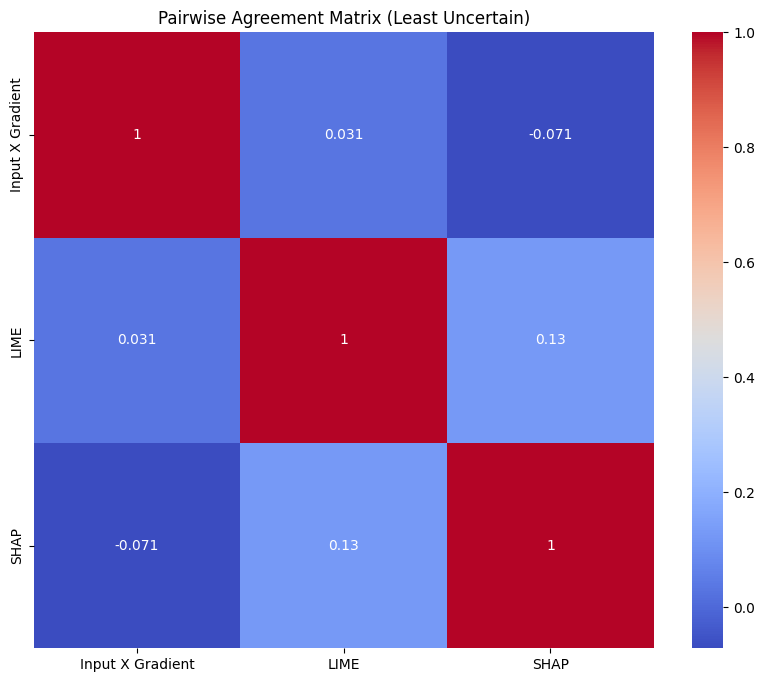

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Function to extract and pad scores from the outputs
def extract_and_pad_scores(outs):
    all_scores = []
    max_length = max(len(out[0].step_scores['mc_dropout_prob_avg']) for out in outs)
    
    for out in outs:
        scores = out[0].step_scores['mc_dropout_prob_avg'].detach().cpu().numpy()
        padded_scores = np.pad(scores, (0, max_length - len(scores)), 'constant')
        all_scores.append(padded_scores)
    
    return np.array(all_scores)

# Load the saved outs files
outs_input_x_gradient = np.load('outs_input_x_gradient.npy', allow_pickle=True).tolist()
outs_lime = np.load('outs_lime.npy', allow_pickle=True).tolist()
outs_shap = np.load('outs_shap.npy', allow_pickle=True).tolist()

# Extract and pad attribution scores
scores_input_x_gradient = extract_and_pad_scores(outs_input_x_gradient)
scores_lime = extract_and_pad_scores(outs_lime)
scores_shap = extract_and_pad_scores(outs_shap)

# Dictionary of scores
scores_dict = {
    'Input X Gradient': scores_input_x_gradient.flatten(),
    'LIME': scores_lime.flatten(),
    'SHAP': scores_shap.flatten()
}

# Function to compute pairwise rank correlation (Spearman's correlation)
def compute_pairwise_agreement(scores_dict):
    methods = list(scores_dict.keys())
    n_methods = len(methods)
    agreement_matrix = np.zeros((n_methods, n_methods))

    for i in range(n_methods):
        for j in range(n_methods):
            if i == j:
                agreement_matrix[i, j] = 1.0
            else:
                rank_corr, _ = spearmanr(scores_dict[methods[i]], scores_dict[methods[j]])
                agreement_matrix[i, j] = rank_corr

    return agreement_matrix, methods

# Compute pairwise agreement matrix
agreement_matrix, methods = compute_pairwise_agreement(scores_dict)

# Function to plot the pairwise agreement matrix
def plot_agreement_matrix(agreement_matrix, methods):
    plt.figure(figsize=(10, 8))
    sns.heatmap(agreement_matrix, xticklabels=methods, yticklabels=methods, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Pairwise Agreement Matrix (Least Uncertain)')
    plt.savefig('matrix most certain.png')
    plt.show()

# Plot the pairwise agreement matrix
plot_agreement_matrix(agreement_matrix, methods)


In [52]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# # Function to extract scores from the outputs
# def extract_scores(outs):
#     all_scores = []
#     for out in outs:
#         scores = out[0].step_scores['mc_dropout_prob_avg'].detach().cpu().numpy()
#         all_scores.append(scores)
#     print(type(all_scores))
#     return np.array(all_scores)

# # Load the saved outs files
# outs_input_x_gradient = np.load('outs_input_x_gradient.npy', allow_pickle=True).tolist()
# outs_lime = np.load('outs_lime.npy', allow_pickle=True).tolist()
# outs_shap = np.load('outs_shap.npy', allow_pickle=True).tolist()

# # Extract attribution scores
# scores_input_x_gradient = extract_scores(outs_input_x_gradient)
# scores_lime = extract_scores(outs_lime)
# scores_shap = extract_scores(outs_shap)

# # Verify the lengths
# print("Lengths of input_x_gradient scores :", [len(scores) for scores in scores_input_x_gradient])
# print("Lengths of lime scores :", [len(scores) for scores in scores_lime])
# print("Lengths of shap scores :", [len(scores) for scores in scores_shap])

# # Flatten scores for pairwise comparison
# def flatten_scores(scores):
#     return np.concatenate(scores)

# # Dictionary of flattened scores
# scores_dict = {
#     'Input X Gradient': flatten_scores(scores_input_x_gradient),
#     'LIME': flatten_scores(scores_lime),
#     'Integrated Gradients': flatten_scores(scores_shap)
# }

# # Function to compute pairwise rank correlation (Spearman's correlation)
# def compute_pairwise_agreement(scores_dict):
#     methods = list(scores_dict.keys())
#     n_methods = len(methods)
#     agreement_matrix = np.zeros((n_methods, n_methods))

#     for i in range(n_methods):
#         for j in range(n_methods):
#             if i == j:
#                 agreement_matrix[i, j] = 1.0
#             else:
#                 rank_corr, _ = spearmanr(scores_dict[methods[i]], scores_dict[methods[j]])
#                 agreement_matrix[i, j] = rank_corr

#     return agreement_matrix, methods

# # Compute pairwise agreement matrix
# agreement_matrix, methods = compute_pairwise_agreement(scores_dict)

# # Function to plot the pairwise agreement matrix
# def plot_agreement_matrix(agreement_matrix, methods):
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(agreement_matrix, xticklabels=methods, yticklabels=methods, annot=True, cmap='coolwarm', cbar=True)
#     plt.title('Pairwise Agreement Matrix')
#     plt.savefig('matrix least certain.png')
#     plt.show()

# # Plot the pairwise agreement matrix
# plot_agreement_matrix(agreement_matrix, methods)


<class 'list'>


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.